In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import wikipedia as wiki #for getting neighbourhood data

import seaborn as sns

import math


print('Libraries imported.')


Libraries imported.


## Getting Coordinates of Delhi

In [2]:
address = 'Delhi, National Capital Territory of Delhi, India'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Indore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Indore City are 28.6517178, 77.2219388.


#### Create a map of Delhi.

In [3]:
# create map of Toronto using latitude and longitude values

map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

map_delhi

## Using Wikipedia to get Neighbourhoods of Delhi

In [4]:
term = "Neighbourhoods_of_Delhi"

links = wiki.page(term).links
print(links, term)

df_neighborhood = pd.DataFrame(links, columns = ["Neighbourhood"])


['1951 Asian Games', '1982 Asian Games', '1987 Cricket World Cup', '1989 Asian Athletics Championships', '1996 Cricket World Cup', '2010 Commonwealth Games', "2010 Men's Hockey World Cup", '2011 Cricket World Cup', 'Adarsh Nagar', 'Agrasen Ki Baoli', 'Amar Jawan Jyoti', 'Anand Vihar', 'Anand Vihar Terminal railway station', 'Architecture of Delhi', 'Arun Jaitley Stadium', 'Ashok Nagar (Delhi)', 'Ashok Vihar', 'Ashokan Edicts in Delhi', 'Ashram Chowk', 'Badarpur, Delhi', 'Bahadur Shah Zafar', 'Bali Nagar', 'Bara Gumbad', 'Barakhamba', 'Barakhamba Road', 'Begum Pur', 'Ber Sarai', 'British East India Company', 'British Raj', 'Central Delhi', 'Central Delhi district', 'Chahamanas of Shakambhari', 'Chanakyapuri', 'Chandni Chowk', 'Chausath Khamba', 'Chawri Bazar', 'Chhatarpur Temple', 'Chhatrasal Stadium', 'Chittaranjan Park', 'Chor Minar', 'Civil Lines, Delhi', 'Connaught Place, New Delhi', 'Coronation Park, Delhi', 'Dabang Delhi', 'Dabri, New Delhi', 'Daryaganj', 'Dayanand Colony', 'Defen

In [5]:
df_neighborhood.head(15)

,Neighbourhood
0,1951 Asian Games
1,1982 Asian Games
2,1987 Cricket World Cup
3,1989 Asian Athletics Championships
4,1996 Cricket World Cup
5,2010 Commonwealth Games
6,2010 Men's Hockey World Cup
7,2011 Cricket World Cup
8,Adarsh Nagar
9,Agrasen Ki Baoli


In [6]:
#First 8 entries are not Neighborhood names, so let's slice the dataframe.

neighborhood_df  = df_neighborhood[8:]


neighborhood_df = neighborhood_df.reset_index(drop = True)


neighborhood_df.head()

#test

location = geolocator.geocode("Adarsh Nagar, Delhi") 

a = str(neighborhood_df.values[0]).lstrip('[').rstrip(']')

print(location.latitude, location.longitude)

28.6141925 77.0715411848447


## Let's find Coordinates of these Neighborhoods

In [7]:
longitude = []
latitude = []
neighbourhood = []

latitude_left = 28.400000
latitude_right = 28.720000

longitude_top = 76.850000
longitude_bottom = 77.320000




geolocator = Nominatim(user_agent="delhi_explorer")

for neighborhood in range(len(neighborhood_df)):
    print(str(neighborhood_df.values[neighborhood] + ", Delhi").lstrip("['").rstrip("']")) #removing square brackets from numpy array.
    
    
    location = geolocator.geocode(str(neighborhood_df.values[neighborhood]).lstrip("['").rstrip("']"))
    
    if location != None and (location.latitude >= latitude_left and location.latitude <= latitude_right) and (location.longitude >= longitude_top and location.longitude <= longitude_bottom):
        
        neighbourhood.append(str(neighborhood_df.values[neighborhood] + ", Delhi").lstrip("['").rstrip("']")) 
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        print(location.latitude, location.longitude)
    
    else: 
        neighbourhood.append(str(neighborhood_df.values[neighborhood] + ", Delhi").lstrip("['").rstrip("']"))
        latitude.append("null")
        longitude.append("null")

location_data = pd.DataFrame(
    {'Latitude': latitude,
     'Longitude': longitude,
     'Neighbourhood': neighbourhood
    })

location_data.head()

Adarsh Nagar, Delhi
Agrasen Ki Baoli, Delhi
28.626067550000002 77.2250111
Amar Jawan Jyoti, Delhi
28.61288 77.2296338
Anand Vihar, Delhi
28.641115 77.3125024
Anand Vihar Terminal railway station, Delhi
28.6488509 77.3155003
Architecture of Delhi, Delhi
28.6288408 77.2458811829139
Arun Jaitley Stadium, Delhi
28.637731549999998 77.24309341201518
Ashok Nagar (Delhi), Delhi
28.6360207 77.101822
Ashok Vihar, Delhi
Ashokan Edicts in Delhi, Delhi
Ashram Chowk, Delhi
Badarpur, Delhi, Delhi
28.4931698 77.3030239
Bahadur Shah Zafar, Delhi
Bali Nagar, Delhi
28.6541384 77.128178
Bara Gumbad, Delhi
28.5930863 77.22035612139237
Barakhamba, Delhi
28.5924658 77.242523
Barakhamba Road, Delhi
28.6273988 77.2288941
Begum Pur, Delhi
Ber Sarai, Delhi
28.54843765 77.18147936338744
British East India Company, Delhi
British Raj, Delhi
Central Delhi, Delhi
28.69854835 77.21939141568413
Central Delhi district, Delhi
28.6772691 77.19815033436757
Chahamanas of Shakambhari, Delhi
Chanakyapuri, Delhi
28.5946775 77.

28.588365 77.2449546
Noida, Delhi
North Delhi, Delhi
28.6138954 77.2090057
North Delhi district, Delhi
North East Delhi, Delhi
North East Delhi district, Delhi
North West Delhi, Delhi
28.6138954 77.2090057
North West Delhi district, Delhi
28.694786450000002 77.14471173091397
Okhla, Delhi
28.5636616 77.2890546
Old Delhi, Delhi
28.6576937 77.22893
Old Delhi Railway Station, Delhi
28.6609052 77.2277153
Paharganj, Delhi
28.6414989 77.2140607
Palam, Delhi
Palika Bazaar, Delhi
Pandav Nagar, Delhi
28.6500237 77.1536755
Parliament of India, Delhi
28.6171875 77.20780819707952
Partition of India, Delhi
Paschim Vihar, Delhi
28.6695782 77.095956
Patel Nagar, Delhi
Patparganj, Delhi
28.6115923 77.2905644
Pitam Pura, Delhi
28.7032676 77.1322497
Pragati Maidan, Delhi
28.6234752 77.2425278
Preet Vihar, Delhi
28.6414409 77.2952594
Prithviraj Raso, Delhi
Punjabi Bagh, Delhi
28.668945 77.1324614
Punjabi cuisine, Delhi
Purana Qila, Delhi
28.6092855 77.2435969
Qutb Minar complex, Delhi
28.524413 77.1854501

,Latitude,Longitude,Neighbourhood
0,null,null,"Adarsh Nagar, Delhi"
1,28.6261,77.225,"Agrasen Ki Baoli, Delhi"
2,28.6129,77.2296,"Amar Jawan Jyoti, Delhi"
3,28.6411,77.3125,"Anand Vihar, Delhi"
4,28.6489,77.3155,"Anand Vihar Terminal railway station, Delhi"


In [8]:
mask = location_data['Latitude'] == 'null'
location_data = location_data[~mask]

In [9]:
#location_data['Latitude'] = location_data['Latitude'].replace('null', np.nan) #replaces null with numpy nan, as it's easier to remove.
#location_data = location_data.dropna(axis=0, subset=['Latitude'])

In [10]:
#location_data = location_data.reset_index() #resetting the index.
#del location_data['level_0']

In [11]:
# dropping duplicate values 
location_data.drop_duplicates(subset =["Latitude", "Longitude"],keep=False,inplace=True) 

In [12]:
location_data.shape

(170, 3)

We have 171 Neighborhoods.

In [13]:
location_data.head()

,Latitude,Longitude,Neighbourhood
1,28.6261,77.225,"Agrasen Ki Baoli, Delhi"
2,28.6129,77.2296,"Amar Jawan Jyoti, Delhi"
3,28.6411,77.3125,"Anand Vihar, Delhi"
4,28.6489,77.3155,"Anand Vihar Terminal railway station, Delhi"
5,28.6288,77.2459,"Architecture of Delhi, Delhi"


## Saving dataframe for future use

In [14]:
location_data.to_csv("D:\Coursera_Capstone\Coursera_Capstone\Week 4\Delhi_location_data.csv",index=False)

#### Create a map of Delhi with neighborhoods superimposed on top.

In [15]:
# create map of Delhi using latitude and longitude values

address = 'Delhi, National Capital Territory of Delhi, India'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(location_data['Latitude'], location_data['Longitude'], location_data['Neighbourhood']):
    #label = '{}'.format(neighborhood)
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
   
map_delhi

## Explore Neighborhoods in Delhi

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version


In [17]:
CLIENT_ID = 'U33A0QNK1IMRJYUHJYJBI0CDQPLT4UPMHTFDVKTHSEBIXC1V' # your Foursquare ID
CLIENT_SECRET = '05MOMADE0EUVGKKCZNHN40FAXX50GWTH342C54MB4N2CQNVI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U33A0QNK1IMRJYUHJYJBI0CDQPLT4UPMHTFDVKTHSEBIXC1V
CLIENT_SECRET:05MOMADE0EUVGKKCZNHN40FAXX50GWTH342C54MB4N2CQNVI


From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Find all the venues around Delhi.

In [19]:
Delhi_venues = getNearbyVenues(names=location_data['Neighbourhood'],
                                   latitudes=location_data['Latitude'],
                                   longitudes=location_data['Longitude']
                                  )

Agrasen Ki Baoli, Delhi
Amar Jawan Jyoti, Delhi
Anand Vihar, Delhi
Anand Vihar Terminal railway station, Delhi
Architecture of Delhi, Delhi
Arun Jaitley Stadium, Delhi
Ashok Nagar (Delhi), Delhi
Badarpur, Delhi, Delhi
Bali Nagar, Delhi
Bara Gumbad, Delhi
Barakhamba, Delhi
Barakhamba Road, Delhi
Ber Sarai, Delhi
Central Delhi, Delhi
Central Delhi district, Delhi
Chanakyapuri, Delhi
Chandni Chowk, Delhi
Chawri Bazar, Delhi
Chittaranjan Park, Delhi
Chor Minar, Delhi
Civil Lines, Delhi, Delhi
Connaught Place, New Delhi, Delhi
Dabri, New Delhi, Delhi
Daryaganj, Delhi
Dayanand Colony, Delhi
Delhi, Delhi
Delhi Cantonment, Delhi
Delhi Development Authority, Delhi
Delhi High Court, Delhi
Delhi Legislative Assembly, Delhi
Delhi Metro, Delhi
Delhi Sarai Rohilla railway station, Delhi
Delhi Stock Exchange, Delhi
Delhi Transport Corporation, Delhi
Derawal Nagar, Delhi
Dhaula Kuan, Delhi
Dilli Haat, Delhi
Dr. Ambedkar Stadium (New Delhi), Delhi
Dr. Karni Singh Shooting Range, Delhi
Dwarka, Delhi, De

#### Let's check the size of the resulting dataframe

In [20]:
Delhi_venues.rename(columns={"Neighbourhood": "Neighbourhood",
                               "Neighborhood Latitude": "Neighbourhood Latitude",
                              "Neighborhood Longitude" : "Neighbourhood Longitude"})
print(Delhi_venues.shape)
Delhi_venues.head(30)

(1287, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Agrasen Ki Baoli, Delhi",28.626068,77.225011,Bijoli grill,28.625905,77.225766,Indian Restaurant
1,"Agrasen Ki Baoli, Delhi",28.626068,77.225011,Ugrasen ki Baoli (Agrasen ki Baoli),28.625820,77.224955,Historic Site
2,"Agrasen Ki Baoli, Delhi",28.626068,77.225011,Max Mueller Bhawan | मैक्स म्यूलर भवन,28.623787,77.224034,Performing Arts Venue
3,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,Amar Jawan Jyoti | अमर जवान ज्योति (Amar Jawan...,28.612980,77.228247,Sculpture Garden
4,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,India Gate | इंडिया गेट (India Gate),28.612796,77.229207,Monument / Landmark
5,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,UPSC Chaat,28.609324,77.227879,Snack Place
6,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,Veg Gulati Restaurant,28.609089,77.230743,Vegetarian / Vegan Restaurant
7,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,Children's Park,28.610664,77.230816,Playground
8,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,National War Memorial,28.613303,77.232579,Memorial Site
9,"Amar Jawan Jyoti, Delhi",28.612880,77.229634,UPSC Lane,28.609346,77.227874,Smoke Shop


Let's check how many venues were returned for each neighborhood

In [21]:
Delhi_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"""Humayun's Tomb, Delhi""",5,5,5,5,5,5
"""Lutyens' Delhi, Delhi""",2,2,2,2,2,2
"Agrasen Ki Baoli, Delhi",3,3,3,3,3,3
"Amar Jawan Jyoti, Delhi",9,9,9,9,9,9
"Anand Vihar Terminal railway station, Delhi",1,1,1,1,1,1
"Anand Vihar, Delhi",4,4,4,4,4,4
"Architecture of Delhi, Delhi",4,4,4,4,4,4
"Arun Jaitley Stadium, Delhi",4,4,4,4,4,4
"Ashok Nagar (Delhi), Delhi",5,5,5,5,5,5


#### Let's find out how many unique categories can be curated from all the returned venues


In [22]:
print('There are {} uniques categories.'.format(len(Delhi_venues['Venue Category'].unique())))

There are 184 uniques categories.


## Analyze Each Neighborhood

In [23]:
# one hot encoding
delhi_onehot = pd.get_dummies(Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighbourhood'] = Delhi_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head(30)

,Neighbourhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Campground,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Memorial Site,Metro Station,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Restaurant,Road,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Amar Jawan Jyoti, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [24]:
delhi_onehot.shape

(1287, 185)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [25]:
delhi_grouped = delhi_onehot.groupby('Neighbourhood').mean().reset_index()
delhi_grouped

,Neighbourhood,ATM,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Campground,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Memorial Site,Metro Station,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,National Park,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Restaurant,Road,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Travel Lounge,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"""Humayun's Tomb, Delhi""",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.200000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#### Let's confirm the new size

In [26]:
delhi_grouped.shape

(159, 185)

#### Let's print each neighborhood along with the top 5 most common venues

In [27]:
num_top_venues = 5

for hood in delhi_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----"Humayun's Tomb, Delhi"----
                 venue  freq
0               Garden   0.2
1        Historic Site   0.2
2           Food Court   0.2
3  Monument / Landmark   0.2
4                 Café   0.2


----"Lutyens' Delhi, Delhi"----
                  venue  freq
0                   ATM   0.5
1         Women's Store   0.5
2  Other Great Outdoors   0.0
3             Multiplex   0.0
4                Museum   0.0


----Agrasen Ki Baoli, Delhi----
                   venue  freq
0          Historic Site  0.33
1      Indian Restaurant  0.33
2  Performing Arts Venue  0.33
3   Other Great Outdoors  0.00
4              Multiplex  0.00


----Amar Jawan Jyoti, Delhi----
               venue  freq
0  Indian Restaurant  0.11
1      Memorial Site  0.11
2               Park  0.11
3   Sculpture Garden  0.11
4         Smoke Shop  0.11


----Anand Vihar Terminal railway station, Delhi----
                  venue  freq
0           Bus Station   1.0
1                   ATM   0.0
2  Other Great Outdo

4         Smoke Shop  0.11


----Indira Gandhi Arena, Delhi----
       venue  freq
0    Stadium   0.5
1  Nightclub   0.5
2        ATM   0.0
3     Office   0.0
4  Multiplex   0.0


----Indira Gandhi International Airport, Delhi----
             venue  freq
0   Airport Lounge  0.15
1  Airport Service  0.15
2      Coffee Shop  0.12
3             Café  0.09
4              Spa  0.06


----Jama Masjid, Delhi, Delhi----
                           venue  freq
0              Indian Restaurant  0.38
1                    Snack Place  0.12
2                         Mosque  0.12
3                          Hotel  0.12
4  Paper / Office Supplies Store  0.12


----Janakpuri, Delhi----
                  venue  freq
0                Bakery  0.25
1  Gym / Fitness Center  0.25
2                  Park  0.25
3                  Café  0.25
4                   ATM  0.00


----Jangpura, Delhi----
                  venue  freq
0  Fast Food Restaurant  0.17
1        Sandwich Place  0.17
2   Indie Movie Theater  0

4  Other Great Outdoors  0.00


----Safdarjung Airport, Delhi----
                venue  freq
0   Indian Restaurant   0.5
1  Chinese Restaurant   0.5
2                 ATM   0.0
3     Other Nightlife   0.0
4              Museum   0.0


----Safdarjung Enclave, Delhi----
                  venue  freq
0  Fast Food Restaurant   0.3
1                 Hotel   0.2
2      Department Store   0.1
3          Dessert Shop   0.1
4           Snack Place   0.1


----Sainik Farm, Delhi----
                  venue  freq
0           Yoga Studio   1.0
1                   ATM   0.0
2  Other Great Outdoors   0.0
3             Multiplex   0.0
4                Museum   0.0


----Saket (Delhi), Delhi----
               venue  freq
0  Indian Restaurant  0.17
1              Hotel  0.17
2   Toy / Game Store  0.08
3         Restaurant  0.08
4               Café  0.08


----Salimgarh Fort, Delhi----
                            venue  freq
0                Business Service   0.5
1      Tourist Information Center   

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = delhi_grouped['Neighbourhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(-1)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""Humayun's Tomb, Delhi""",Food Court,Garden,Monument / Landmark,Café,Historic Site,Zoo,Electronics Store,Food & Drink Shop,Food,Flea Market
1,"""Lutyens' Delhi, Delhi""",ATM,Women's Store,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
2,"Agrasen Ki Baoli, Delhi",Indian Restaurant,Performing Arts Venue,Historic Site,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
3,"Amar Jawan Jyoti, Delhi",Indian Restaurant,Memorial Site,Park,Playground,Sculpture Garden,Smoke Shop,Snack Place,Monument / Landmark,Vegetarian / Vegan Restaurant,Herbs & Spices Store
4,"Anand Vihar Terminal railway station, Delhi",Bus Station,Zoo,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
5,"Anand Vihar, Delhi",Movie Theater,Pizza Place,Hotel,Shoe Store,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
6,"Architecture of Delhi, Delhi",Plaza,Clothing Store,Performing Arts Venue,Metro Station,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
7,"Arun Jaitley Stadium, Delhi",Soccer Stadium,Cricket Ground,History Museum,Historic Site,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
8,"Ashok Nagar (Delhi), Delhi",Ice Cream Shop,Clothing Store,Fast Food Restaurant,Café,North Indian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
9,"Badarpur, Delhi, Delhi",IT Services,Train Station,Zoo,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


## Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [30]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

delhi_group_clustering = delhi_grouped_clustering.astype(int)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10].astype(int) 

labels=pd.DataFrame(kmeans.labels_)


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [31]:
# add clustering labels
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], axis = 1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



print("Cluster Labels : ",neighborhoods_venues_sorted['Cluster Labels'].dtype)

delhi_merged = location_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


#delhi_merged['Cluster Labels'] = delhi_merged['Cluster Labels'].astype(int)

print("Cluster Labels Delhi_merged:", delhi_merged['Cluster Labels'].dtype)

delhi_merged.head() # check the last columns!


Cluster Labels :  int32
Cluster Labels Delhi_merged: float64


,Latitude,Longitude,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.6261,77.225,"Agrasen Ki Baoli, Delhi",1.0,Indian Restaurant,Performing Arts Venue,Historic Site,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
2,28.6129,77.2296,"Amar Jawan Jyoti, Delhi",2.0,Indian Restaurant,Memorial Site,Park,Playground,Sculpture Garden,Smoke Shop,Snack Place,Monument / Landmark,Vegetarian / Vegan Restaurant,Herbs & Spices Store
3,28.6411,77.3125,"Anand Vihar, Delhi",3.0,Movie Theater,Pizza Place,Hotel,Shoe Store,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
4,28.6489,77.3155,"Anand Vihar Terminal railway station, Delhi",2.0,Bus Station,Zoo,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
5,28.6288,77.2459,"Architecture of Delhi, Delhi",2.0,Plaza,Clothing Store,Performing Arts Venue,Metro Station,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market


In [32]:
delhi_merged = delhi_merged.dropna(axis=0, subset=['Cluster Labels'])
delhi_merged['Cluster Labels'] = delhi_merged['Cluster Labels'].astype(int)
delhi_merged
#location_data = location_data.dropna(axis=0, subset=['Latitude'])

,Latitude,Longitude,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.6261,77.225,"Agrasen Ki Baoli, Delhi",1,Indian Restaurant,Performing Arts Venue,Historic Site,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
2,28.6129,77.2296,"Amar Jawan Jyoti, Delhi",2,Indian Restaurant,Memorial Site,Park,Playground,Sculpture Garden,Smoke Shop,Snack Place,Monument / Landmark,Vegetarian / Vegan Restaurant,Herbs & Spices Store
3,28.6411,77.3125,"Anand Vihar, Delhi",3,Movie Theater,Pizza Place,Hotel,Shoe Store,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
4,28.6489,77.3155,"Anand Vihar Terminal railway station, Delhi",2,Bus Station,Zoo,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
5,28.6288,77.2459,"Architecture of Delhi, Delhi",2,Plaza,Clothing Store,Performing Arts Venue,Metro Station,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
6,28.6377,77.2431,"Arun Jaitley Stadium, Delhi",2,Soccer Stadium,Cricket Ground,History Museum,Historic Site,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
7,28.636,77.1018,"Ashok Nagar (Delhi), Delhi",3,Ice Cream Shop,Clothing Store,Fast Food Restaurant,Café,North Indian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
11,28.4932,77.303,"Badarpur, Delhi, Delhi",2,IT Services,Train Station,Zoo,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
13,28.6541,77.1282,"Bali Nagar, Delhi",3,Light Rail Station,Indian Restaurant,Dessert Shop,Shopping Mall,Shoe Store,Pizza Place,Chinese Restaurant,Ice Cream Shop,Cricket Ground,Fabric Shop
14,28.5931,77.2204,"Bara Gumbad, Delhi",4,Boarding House,Park,History Museum,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


Finally, let's visualize the resulting clusters


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighbourhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 1

In [34]:
cluster1 = delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[0]+ [1] + [2] + list(range(4,delhi_merged.shape[1]))]]
n_in_c1 = cluster1['Neighbourhood'].count()
cluster1

,Latitude,Longitude,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,28.4532,77.0153,"Gandhi Nagar, Delhi, Delhi",ATM,Electronics Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
169,28.5178,77.2797,"""Lutyens' Delhi, Delhi""",ATM,Women's Store,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
188,28.6123,76.9824,"Najafgarh, Delhi",ATM,Bank,Food & Drink Shop,Fabric Shop,French Restaurant,Food Truck,Food Court,Food,Flea Market,Fast Food Restaurant
196,28.6773,77.286,"Naveen Shahdara, Delhi",ATM,Mobile Phone Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
277,28.6504,77.1846,"Shopping in Delhi, Delhi",ATM,Electronics Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant


#### Cluster 2

In [35]:
cluster2 = delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[0]+ [1] + [2] + list(range(4, delhi_merged.shape[1]))]]
n_in_c2 = cluster2['Neighbourhood'].count()
cluster2

,Latitude,Longitude,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.6261,77.225,"Agrasen Ki Baoli, Delhi",Indian Restaurant,Performing Arts Venue,Historic Site,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
15,28.5925,77.2425,"Barakhamba, Delhi",Indian Restaurant,Hotel,Arts & Crafts Store,Historic Site,Garden,Monument / Landmark,Mughlai Restaurant,Pizza Place,Cocktail Bar,Restaurant
16,28.6274,77.2289,"Barakhamba Road, Delhi",Indian Restaurant,Art Gallery,Bakery,Café,Theater,Hotel Bar,Arcade,Historic Site,Hotel,Eastern European Restaurant
25,28.656,77.2322,"Chandni Chowk, Delhi",Indian Restaurant,Market,Snack Place,Hotel,Smoke Shop,Flea Market,Paper / Office Supplies Store,Dessert Shop,Fast Food Restaurant,Food & Drink Shop
27,28.6502,77.2294,"Chawri Bazar, Delhi",Indian Restaurant,Paper / Office Supplies Store,Mosque,Frozen Yogurt Shop,Fast Food Restaurant,Snack Place,Light Rail Station,Hardware Store,Smoke Shop,Hotel
33,28.6314,77.2198,"Connaught Place, New Delhi, Delhi",Indian Restaurant,Café,Chinese Restaurant,Bar,Lounge,Coffee Shop,Pub,Italian Restaurant,South Indian Restaurant,BBQ Joint
37,28.6461,77.243,"Daryaganj, Delhi",Indian Restaurant,Restaurant,Hotel,Road,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
42,28.5938,77.135,"Delhi Cantonment, Delhi",Indian Restaurant,Shopping Mall,Café,Restaurant,Coffee Shop,Hostel,Donut Shop,Flea Market,Hotel,Fast Food Restaurant
57,28.6628,77.1853,"Delhi Sarai Rohilla railway station, Delhi",Indian Restaurant,Fast Food Restaurant,Electronics Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Falafel Restaurant
100,28.5571,77.213,"Gulmohar Park, Delhi",Indian Restaurant,Park,Music Venue,Theater,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


#### Cluster 3

In [36]:
cluster3 = delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[0]+ [1] + [2] + list(range(4, delhi_merged.shape[1]))]]
n_in_c3 = cluster3['Neighbourhood'].count()
cluster3

,Latitude,Longitude,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.6129,77.2296,"Amar Jawan Jyoti, Delhi",Indian Restaurant,Memorial Site,Park,Playground,Sculpture Garden,Smoke Shop,Snack Place,Monument / Landmark,Vegetarian / Vegan Restaurant,Herbs & Spices Store
4,28.6489,77.3155,"Anand Vihar Terminal railway station, Delhi",Bus Station,Zoo,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
5,28.6288,77.2459,"Architecture of Delhi, Delhi",Plaza,Clothing Store,Performing Arts Venue,Metro Station,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
6,28.6377,77.2431,"Arun Jaitley Stadium, Delhi",Soccer Stadium,Cricket Ground,History Museum,Historic Site,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
11,28.4932,77.303,"Badarpur, Delhi, Delhi",IT Services,Train Station,Zoo,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
18,28.5484,77.1815,"Ber Sarai, Delhi",Café,Airport Food Court,Hotel,Clothing Store,Shopping Mall,History Museum,Fast Food Restaurant,Eastern European Restaurant,Food & Drink Shop,Food
22,28.6773,77.1982,"Central Delhi district, Delhi",Fried Chicken Joint,Flea Market,Park,Concert Hall,Hotel,Duty-free Shop,Food & Drink Shop,Food,Hotel Bar,Fast Food Restaurant
24,28.5947,77.1885,"Chanakyapuri, Delhi",Performing Arts Venue,Trail,Zoo,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
30,28.5388,77.2492,"Chittaranjan Park, Delhi",Market,Bowling Alley,Zoo,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
31,28.5477,77.2056,"Chor Minar, Delhi",Dessert Shop,Ice Cream Shop,Market,Coffee Shop,Burger Joint,Metro Station,Food Truck,Food Court,Food & Drink Shop,Food


#### Cluster 4

In [37]:
cluster4 = delhi_merged.loc[delhi_merged['Cluster Labels'] == 3, delhi_merged.columns[[0]+ [1] + [2] + list(range(4, delhi_merged.shape[1]))]]
n_in_c4 = cluster4['Neighbourhood'].count()
cluster4

,Latitude,Longitude,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,28.6411,77.3125,"Anand Vihar, Delhi",Movie Theater,Pizza Place,Hotel,Shoe Store,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
7,28.636,77.1018,"Ashok Nagar (Delhi), Delhi",Ice Cream Shop,Clothing Store,Fast Food Restaurant,Café,North Indian Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market
13,28.6541,77.1282,"Bali Nagar, Delhi",Light Rail Station,Indian Restaurant,Dessert Shop,Shopping Mall,Shoe Store,Pizza Place,Chinese Restaurant,Ice Cream Shop,Cricket Ground,Fabric Shop
50,28.6088,77.2364,"Delhi High Court, Delhi",Cafeteria,Fast Food Restaurant,Hockey Arena,Park,Art Gallery,Eastern European Restaurant,Food Court,Food & Drink Shop,Food,Flea Market
70,28.6998,77.1901,"Derawal Nagar, Delhi",Pizza Place,Snack Place,Shopping Mall,Bakery,Food Truck,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Falafel Restaurant
81,28.6384,77.2864,"East Delhi district, Delhi",Fast Food Restaurant,Indian Restaurant,Grocery Store,Chinese Restaurant,Office,Café,Multiplex,Shopping Mall,Food & Drink Shop,Food Court
85,28.4028,77.3086,"Faridabad, Delhi",Ice Cream Shop,Fast Food Restaurant,Zoo,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Falafel Restaurant
102,28.4646,77.0299,"Gurugram, Delhi",Market,Fast Food Restaurant,Bus Station,Zoo,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Falafel Restaurant
134,28.5825,77.2415,"Jangpura, Delhi",Fast Food Restaurant,Sandwich Place,Hotel,Indie Movie Theater,Food,Chinese Restaurant,Metro Station,Snack Place,Market,BBQ Joint
140,28.5371,77.2618,"Kalkaji, Delhi",Gym,Pizza Place,Hotel,Dessert Shop,Food Truck,Sandwich Place,Zoo,Food & Drink Shop,Food,Flea Market


#### Cluster 5

In [38]:
cluster5 = delhi_merged.loc[delhi_merged['Cluster Labels'] == 4, delhi_merged.columns[[0]+[1]+ [2] + list(range(4, delhi_merged.shape[1]))]]

In [39]:
n_in_c5 = cluster5['Neighbourhood'].count()
cluster5

,Latitude,Longitude,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,28.5931,77.2204,"Bara Gumbad, Delhi",Boarding House,Park,History Museum,Zoo,Electronics Store,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
21,28.6985,77.2194,"Central Delhi, Delhi",Cosmetics Shop,Park,Zoo,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
77,28.5001,77.2675,"Dr. Karni Singh Shooting Range, Delhi",Stadium,IT Services,Zoo,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
123,28.6312,77.2496,"Indira Gandhi Arena, Delhi",Stadium,Nightclub,Zoo,Fried Chicken Joint,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
136,28.5834,77.2335,"Jawaharlal Nehru Stadium (Delhi), Delhi",Stadium,Park,Athletics & Sports,Zoo,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
279,28.5521,77.2247,"Siri Fort, Delhi",Stadium,Park,Café,Zoo,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
321,28.6636,77.3118,"Yamuna Sports Complex, Delhi",Athletics & Sports,Track,Zoo,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


## Let's Check for number of Restaurants in Each Neighbourhood.

In [40]:
delhi_grouped1 =delhi_onehot.groupby('Neighbourhood').sum().reset_index()
delhi_grouped1
Num_restaurants= delhi_grouped1[['Neighbourhood','Indian Restaurant','Asian Restaurant','Chinese Restaurant','Fast Food Restaurant','Vegetarian / Vegan Restaurant','South Indian Restaurant','Food Court'] ]
Num_restaurants['Cluster']=labels[0]
Num_restaurants

c:\python 3.7.9\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Cluster
0,"""Humayun's Tomb, Delhi""",0,0,0,0,0,0,1,2
1,"""Lutyens' Delhi, Delhi""",0,0,0,0,0,0,0,0
2,"Agrasen Ki Baoli, Delhi",1,0,0,0,0,0,0,1
3,"Amar Jawan Jyoti, Delhi",1,0,0,0,1,0,0,2
4,"Anand Vihar Terminal railway station, Delhi",0,0,0,0,0,0,0,2
5,"Anand Vihar, Delhi",0,0,0,0,0,0,0,3
6,"Architecture of Delhi, Delhi",0,0,0,0,0,0,0,2
7,"Arun Jaitley Stadium, Delhi",0,0,0,0,0,0,0,2
8,"Ashok Nagar (Delhi), Delhi",0,0,0,1,0,0,0,3
9,"Badarpur, Delhi, Delhi",0,0,0,0,0,0,0,2


## Get Total Restaurants in Every Cluster

In [41]:
Count_restaurants=Num_restaurants.groupby('Cluster').sum().reset_index()
Count_restaurants.Cluster.replace({0:'Cluster 0', 1: 'Cluster 1',2:'Cluster 2',3:'Cluster 3', 4: 'Cluster 4'}, inplace=True)
Count_restaurants1=Count_restaurants


Count_restaurants1['Total Restaurants']=Count_restaurants1.sum(axis=1)
Count_restaurants1['Number of Neighbourhoods']=[n_in_c1,n_in_c2,n_in_c3,n_in_c4,n_in_c5]
Count_restaurants1 = Count_restaurants1.drop('Cluster', axis=1)
Count_restaurants1

,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total Restaurants,Number of Neighbourhoods
0,0,0,0,0,1,0,0,1,5
1,76,3,15,12,0,2,0,108,36
2,45,12,10,14,6,3,4,94,86
3,7,0,5,25,0,1,1,39,25
4,0,0,0,0,0,0,0,0,7


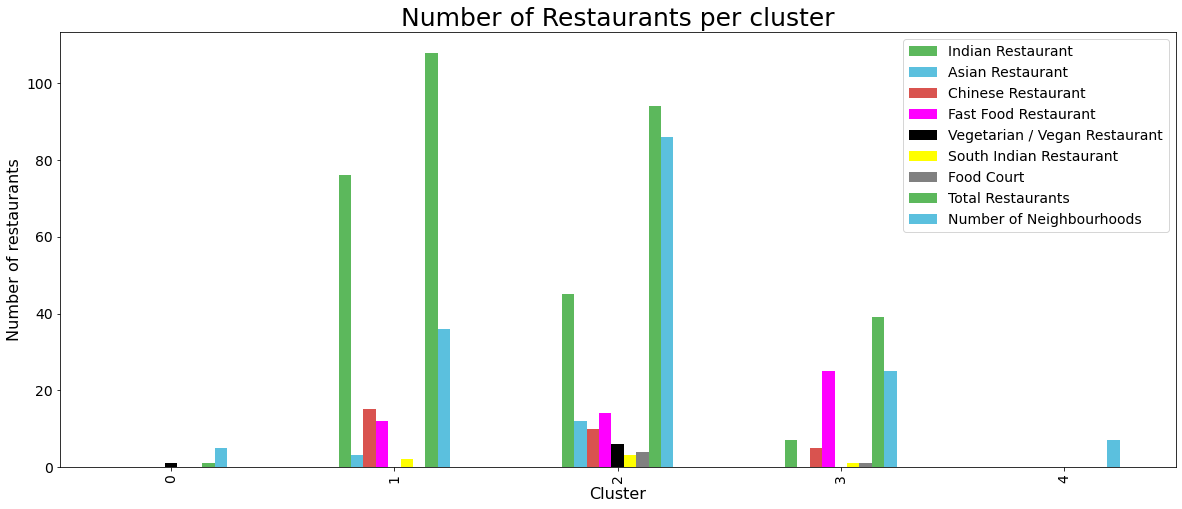

In [42]:
ax=Count_restaurants.plot(kind='bar', figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','magenta','black','yellow','grey'], width=0.5)


ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Number of Restaurants per cluster", fontsize=25)
ax.set_xlabel('Cluster', fontsize=16)
ax.set_ylabel('Number of restaurants',fontsize=16)
plt.show()

## Calculating Number of Restaurants / Neighbourhood.

In [43]:
Count_restaurants1['Restaurants per neighbourhood']=Count_restaurants1['Total Restaurants']/Count_restaurants1['Number of Neighbourhoods']

In [44]:
Count_restaurants1

,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total Restaurants,Number of Neighbourhoods,Restaurants per neighbourhood
0,0,0,0,0,1,0,0,1,5,0.200000
1,76,3,15,12,0,2,0,108,36,3.000000
2,45,12,10,14,6,3,4,94,86,1.093023
3,7,0,5,25,0,1,1,39,25,1.560000
4,0,0,0,0,0,0,0,0,7,0.000000


Number of Restaurants in **Cluster 0** & **Cluster 4** is the least. So, let's examine them further.

In [45]:
cl=Num_restaurants[Num_restaurants.Cluster == 0]
cl0=cl.drop('Cluster',axis=1)
cl0['Total']=cl0.sum(axis=1)
cl0.reset_index
cl0

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
1,"""Lutyens' Delhi, Delhi""",0,0,0,0,0,0,0,0
46,"Gandhi Nagar, Delhi, Delhi",0,0,0,0,0,0,0,0
82,"Najafgarh, Delhi",0,0,0,0,0,0,0,0
85,"Naveen Shahdara, Delhi",0,0,0,0,1,0,0,1
134,"Shopping in Delhi, Delhi",0,0,0,0,0,0,0,0


In [46]:
cl=Num_restaurants[Num_restaurants.Cluster == 4]
cl4=cl.drop('Cluster',axis=1)
cl4['Total']=cl4.sum(axis=1)
cl4

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
11,"Bara Gumbad, Delhi",0,0,0,0,0,0,0,0
16,"Central Delhi, Delhi",0,0,0,0,0,0,0,0
39,"Dr. Karni Singh Shooting Range, Delhi",0,0,0,0,0,0,0,0
56,"Indira Gandhi Arena, Delhi",0,0,0,0,0,0,0,0
62,"Jawaharlal Nehru Stadium (Delhi), Delhi",0,0,0,0,0,0,0,0
136,"Siri Fort, Delhi",0,0,0,0,0,0,0,0
157,"Yamuna Sports Complex, Delhi",0,0,0,0,0,0,0,0


Neighbourhoods in Cluster 0 mostly lie in outer parts of Delhi with leas amount of footfall and Neighbourhoods in Cluster 4 are not actual neighbourhoods, so skipping it.

Moving further, we have options of Cluster 1 and Cluster 3.

In [47]:
cl=Num_restaurants[Num_restaurants.Cluster == 3]
cl3=cl.drop('Cluster',axis=1)
cl3['Total']=cl3.sum(axis=1)
cl3.reset_index
cl3

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
5,"Anand Vihar, Delhi",0,0,0,0,0,0,0,0
8,"Ashok Nagar (Delhi), Delhi",0,0,0,1,0,0,0,1
10,"Bali Nagar, Delhi",1,0,1,0,0,0,0,2
29,"Delhi High Court, Delhi",0,0,0,1,0,0,0,1
35,"Derawal Nagar, Delhi",0,0,0,0,0,0,0,0
41,"East Delhi district, Delhi",1,0,1,2,0,0,1,5
45,"Faridabad, Delhi",0,0,0,1,0,0,0,1
51,"Gurugram, Delhi",0,0,0,1,0,0,0,1
60,"Jangpura, Delhi",0,0,1,2,0,0,0,3
64,"Kalkaji, Delhi",0,0,0,0,0,0,0,0


In [48]:
cl=Num_restaurants[Num_restaurants.Cluster == 1]
cl1=cl.drop('Cluster',axis=1)
cl1['Total']=cl1.sum(axis=1)
cl1.reset_index
cl1

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
2,"Agrasen Ki Baoli, Delhi",1,0,0,0,0,0,0,1
12,"Barakhamba Road, Delhi",4,0,0,0,0,0,0,4
13,"Barakhamba, Delhi",3,0,0,0,0,0,0,3
18,"Chandni Chowk, Delhi",4,0,0,1,0,0,0,5
19,"Chawri Bazar, Delhi",3,0,0,1,0,0,0,4
23,"Connaught Place, New Delhi, Delhi",12,1,5,1,0,2,0,21
25,"Daryaganj, Delhi",2,0,0,0,0,0,0,2
27,"Delhi Cantonment, Delhi",1,0,0,0,0,0,0,1
32,"Delhi Sarai Rohilla railway station, Delhi",1,0,0,1,0,0,0,2
50,"Gulmohar Park, Delhi",1,0,0,0,0,0,0,1


Selecting Cluster 1 because a lot of Neighbourhoods in this cluster belong to the center of the city or have very high footfall.

In [49]:
cl1.sort_values('Total', ascending = True) #sorting by total 

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
2,"Agrasen Ki Baoli, Delhi",1,0,0,0,0,0,0,1
144,"Teen Murti Bhavan, Delhi",1,0,0,0,0,0,0,1
109,"Rajpath, Delhi",1,0,0,0,0,0,0,1
106,"Raisina Hill, Delhi",1,0,0,0,0,0,0,1
100,"Pitam Pura, Delhi",1,0,0,0,0,0,0,1
97,"Parliament of India, Delhi",1,0,0,0,0,0,0,1
96,"Pandav Nagar, Delhi",1,0,0,0,0,0,0,1
91,"Nizamuddin West, Delhi",1,0,0,0,0,0,0,1
152,"Vikaspuri, Delhi",1,0,0,0,0,0,0,1
74,"Mayapuri, Delhi",1,0,0,0,0,0,0,1


In [50]:
#getting neighbourhoods with only 1 restaurant.
mask = cl1['Total'] == 1
cl1 = cl1[mask]
cl1

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total
2,"Agrasen Ki Baoli, Delhi",1,0,0,0,0,0,0,1
27,"Delhi Cantonment, Delhi",1,0,0,0,0,0,0,1
50,"Gulmohar Park, Delhi",1,0,0,0,0,0,0,1
54,"INA Colony, Delhi",1,0,0,0,0,0,0,1
68,"Khari Baoli, Delhi",1,0,0,0,0,0,0,1
74,"Mayapuri, Delhi",1,0,0,0,0,0,0,1
83,"National Police Memorial (India), Delhi",1,0,0,0,0,0,0,1
91,"Nizamuddin West, Delhi",1,0,0,0,0,0,0,1
96,"Pandav Nagar, Delhi",1,0,0,0,0,0,0,1
97,"Parliament of India, Delhi",1,0,0,0,0,0,0,1


In [51]:
geolocator = Nominatim(user_agent="delhi_explorer")

cl1_latitude = []
cl1_longitude = []


for neighbourhood in range(len(cl1)):
    print(str(cl1.values[neighbourhood]).lstrip("['").rstrip("'1 0 0 0 0 0 0 1]")) #removing square brackets from numpy array.
    
    real_location = str(cl1.values[neighbourhood]).lstrip("['").rstrip("'1 0 0 0 0 0 0 1]")
    cl1_location = geolocator.geocode(real_location)
    
    
    if cl1_location == None:
        
        cl1_latitude.append('Null')
        cl1_longitude.append('Null')
        
    else:
        cl1_latitude.append(cl1_location.latitude)
        cl1_longitude.append(cl1_location.longitude)
        print(cl1_location.latitude, cl1_location.longitude)

cl1['Latitude'] = cl1_latitude
cl1['Longitude'] = cl1_longitude

Agrasen Ki Baoli, Delhi
28.626067550000002 77.2250111
Delhi Cantonment, Delhi
28.593833099999998 77.13497891459929
Gulmohar Park, Delhi
28.5571011 77.2130055
INA Colony, Delhi
28.5772814 77.2126489
Khari Baoli, Delhi
28.6571123 77.2210724
Mayapuri, Delhi
28.6252818 77.1209701
National Police Memorial (India), Delhi
Nizamuddin West, Delhi
28.588365 77.2449546
Pandav Nagar, Delhi
28.6500237 77.1536755
Parliament of India, Delhi
28.6171875 77.20780819707952
Pitam Pura, Delhi
28.7032676 77.1322497
Raisina Hill, Delhi
28.6142263 77.2039446
Rajpath, Delhi
28.6131425 77.2247645
Teen Murti Bhavan, Delhi
28.60259435 77.19878110123034
Vikaspuri, Delhi
28.638419050000003 77.07083614685489


c:\python 3.7.9\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\python 3.7.9\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
mask = cl1['Latitude'] == 'Null'

cl1 = cl1[~mask]
cl1

,Neighbourhood,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Food Court,Total,Latitude,Longitude
2,"Agrasen Ki Baoli, Delhi",1,0,0,0,0,0,0,1,28.6261,77.225
27,"Delhi Cantonment, Delhi",1,0,0,0,0,0,0,1,28.5938,77.135
50,"Gulmohar Park, Delhi",1,0,0,0,0,0,0,1,28.5571,77.213
54,"INA Colony, Delhi",1,0,0,0,0,0,0,1,28.5773,77.2126
68,"Khari Baoli, Delhi",1,0,0,0,0,0,0,1,28.6571,77.2211
74,"Mayapuri, Delhi",1,0,0,0,0,0,0,1,28.6253,77.121
91,"Nizamuddin West, Delhi",1,0,0,0,0,0,0,1,28.5884,77.245
96,"Pandav Nagar, Delhi",1,0,0,0,0,0,0,1,28.65,77.1537
97,"Parliament of India, Delhi",1,0,0,0,0,0,0,1,28.6172,77.2078
100,"Pitam Pura, Delhi",1,0,0,0,0,0,0,1,28.7033,77.1322


In [53]:
cl1_venues = getNearbyVenues(names=cl1['Neighbourhood'],
                                   latitudes = cl1['Latitude'],
                                   longitudes = cl1['Longitude']
                                  )

Agrasen Ki Baoli, Delhi
Delhi Cantonment, Delhi
Gulmohar Park, Delhi
INA Colony, Delhi
Khari Baoli, Delhi
Mayapuri, Delhi
Nizamuddin West, Delhi
Pandav Nagar, Delhi
Parliament of India, Delhi
Pitam Pura, Delhi
Raisina Hill, Delhi
Rajpath, Delhi
Teen Murti Bhavan, Delhi
Vikaspuri, Delhi


In [54]:
# one hot encoding
cl1_onehot = pd.get_dummies(cl1_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cl1_onehot['Neighbourhood'] = cl1_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [cl1_onehot.columns[-1]] + list(cl1_onehot.columns[:-1])
cl1_onehot = cl1_onehot[fixed_columns]

cl1_onehot

,Neighbourhood,Antique Shop,Arcade,BBQ Joint,Bike Shop,Café,Coffee Shop,Dessert Shop,Flea Market,Food & Drink Shop,Gift Shop,Gym,Historic Site,History Museum,Hostel,Ice Cream Shop,Indian Restaurant,Light Rail Station,Market,Metro Station,Miscellaneous Shop,Monument / Landmark,Movie Theater,Mughlai Restaurant,Museum,Music Venue,National Park,Park,Performing Arts Venue,Pizza Place,Planetarium,Restaurant,Sculpture Garden,Shopping Mall,Snack Place,Spiritual Center,Theater,Train Station,Wings Joint
0,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Agrasen Ki Baoli, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,"Delhi Cantonment, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,"Delhi Cantonment, Delhi",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Delhi Cantonment, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Delhi Cantonment, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,"Delhi Cantonment, Delhi",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Gulmohar Park, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,"Gulmohar Park, Delhi",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [82]:
cl1_grouped = cl1_onehot.groupby('Neighbourhood').sum().reset_index()
cl1_grouped= cl1_grouped[['Neighbourhood', 'Indian Restaurant', 'Mughlai Restaurant', 'Restaurant' ]]
cl1_grouped['Total'] = cl1_grouped.sum(axis=1)
cl1_grouped.sort_values('Total', ascending = True)

,Neighbourhood,Indian Restaurant,Mughlai Restaurant,Restaurant,Total
0,"Agrasen Ki Baoli, Delhi",1,0,0,1
2,"Gulmohar Park, Delhi",1,0,0,1
3,"INA Colony, Delhi",1,0,0,1
4,"Khari Baoli, Delhi",1,0,0,1
7,"Pandav Nagar, Delhi",1,0,0,1
8,"Parliament of India, Delhi",1,0,0,1
9,"Pitam Pura, Delhi",1,0,0,1
10,"Raisina Hill, Delhi",1,0,0,1
11,"Rajpath, Delhi",1,0,0,1
12,"Teen Murti Bhavan, Delhi",1,0,0,1


In [56]:
num_top_venues = 5
for hood in cl1_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = cl1_grouped[cl1_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agrasen Ki Baoli, Delhi----
                   venue  freq
0      Indian Restaurant  0.33
1  Performing Arts Venue  0.33
2          Historic Site  0.33
3           Antique Shop  0.00
4    Monument / Landmark  0.00


----Delhi Cantonment, Delhi----
               venue  freq
0         Restaurant   0.2
1               Café   0.2
2        Coffee Shop   0.2
3  Indian Restaurant   0.2
4      Shopping Mall   0.2


----Gulmohar Park, Delhi----
               venue  freq
0            Theater  0.25
1  Indian Restaurant  0.25
2        Music Venue  0.25
3               Park  0.25
4       Antique Shop  0.00


----INA Colony, Delhi----
                   venue  freq
0           Antique Shop  0.25
1          Train Station  0.25
2     Light Rail Station  0.25
3      Indian Restaurant  0.25
4  Performing Arts Venue  0.00


----Khari Baoli, Delhi----
                venue  freq
0        Dessert Shop  0.29
1  Miscellaneous Shop  0.14
2              Market  0.14
3         Snack Place  0.14
4   Food &

On analysing the collected Data, we can infer that it will be better to open a restaurant in Cluster1 Neighbourhoods, namely : <br> 

1. Pitam Pura, Delhi because it has a Metro Station nearby.

2. Delhi Cantonment, because it has a Shopping Mall nearby. <br>

Both confirm the Higher Rate of footfall than any other Neighbourhood in this Cluster.